# Cadenas de Markov

## Transiciones de Estado

La secuencia de variables aleatorias $x_0, x_1, x_2, \dots, x_t , \dots$ representa un **proceso estocástico**.

Cuando se indexan solamente los puntos en el tiempo en el que ocurren *cambios* significativos, se habla de **procesos estocásticos de tiempo discreto**.

Hablamos de **estado** como la condición o característica de un sistema en momento dado. Se asume que hay un número finito de estados numerados $1, \dots, N$ que pueden describir al sistema en un cualquier momento. Cuando el sistema cambia de un estado a otro se dice que ocurre una **transición**.

\begin{equation}
P (x_{t+1} = s_{t+1} | x_t = s_t , x_{t−1} = s_{t−1}, \dots , x_1 = s_1, x_0 = s_0)\\
= P (x_{t+1} = s_{t+1} | x_t = s_t )
\end{equation}

Se conoce como **propiedad de Markov** el hecho que la probabilidad del estado en $t+1$ dependa solamente del estado en $t$.

Y como cada $x_t$ depende tan solo de $x_{t-1}$ e influye solamente en $x_{t+1}$ se dice que el proceso es una **cadena de Markov**.

Si, además el número de estados es numerable y finito, se habla de un **cadena de Markov de estado finito**.

Una suposición adicional es que la probabilidad de transición de un estado $i$ a un estado $j$ es constante en el tiempo.

\begin{equation}
P (x_{t+1} = j | x_t = i) = p_{ij}
\end{equation}

es independiente del índice del tiempo $t$, esto se conoce como la **propiedad estacionaria**.

La probabilidad $p_{ij}$ se denomina **probabilidad de transición**, al definirse para todos los estados del sistema $i,j = 1, 2, \dots, N$, y se suelen escribir en una **matriz de probabilidades de transición**.

\begin{equation}
\mathbf{P} = \begin{bmatrix}
       p_{11} & p_{12} & \dots & p_{1N} \\
       p_{21} & p_{22} & \dots & p_{2N} \\
       \vdots & \vdots & \ddots & \vdots \\
       p_{N1} & p_{N2} & \dots & p_{NN} \\
     \end{bmatrix}
\end{equation}

Además, los elementos de cada fila forma una distribución de probabilidades discreta, por lo tanto:

\begin{equation}
    \displaystyle\sum_{j=1}^{N}p_{ij}=1
\end{equation}


Un proceso de Markov comienza en algún momento inicial $t = 0$. Si el estado $x_0$ no se conoce con certeza, entonces debemos especificar las probabilidades con las que el sistema se encuentra inicialmente en cada uno de los $N$ estados. Denotamos esto como $P(x_0 = i) = p_i(0)$ para cada estado $i$, y usamos el vector

\begin{equation}
    \mathbf{p}(0) = [p_1(0), p_2(0), \dots, p_N(0)]
\end{equation}


para describir la **distribución de probabilidad inicial** del sistema.

## Ejemplo

En un lugar se pueden describir los días como soleados, nublados, y lluviosos. Después de observar los patrones históricos, la condición del clima del siguiente día puede ser descrita de acuerdo a las siguientes probabilidades de transición:

\begin{equation}
\mathbf{P} = \begin{bmatrix}
       0.7 & 0.1 & 0.2 \\
       0.2 & 0.7 & 0.1 \\
       0.5 & 0.2 & 0.3 \\
     \end{bmatrix}
\end{equation}

Las probabilidades de un paso pueden ilustrarse mediante un **diagrama de transición de estados**, en el que los estados se representan por *nodos* y las posibles transiciones como *vértices*.

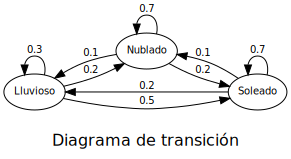

In [1]:
from graphviz import Digraph
# Create Digraph object
g = Digraph()
g.attr(rankdir='RL', label='\nDiagrama de transición', fontsize='16', fontname='Lato')
g.attr('node', fontsize='10', fontname='Lato')
g.attr('edge', fontsize='10', fontname='Lato')

# Add nodes
g.node('1', 'Soleado')
g.node('2', 'Nublado')
g.node('3', 'Lluvioso')

# Add edges
g.edge('1', '1', '0.7')
g.edge('1', '2', '0.1')
g.edge('1', '3', '0.2')
g.edge('2', '1', '0.2')
g.edge('2', '2', '0.7')
g.edge('2', '3', '0.1')
g.edge('3', '1', '0.5')
g.edge('3', '2', '0.2')
g.edge('3', '3', '0.3')

# Visualize the graph
g

Si se desea conocer si una determinada condición del clima prevalece durante dos días, se puede utilizar un **árbol de transición** de dos pasos.

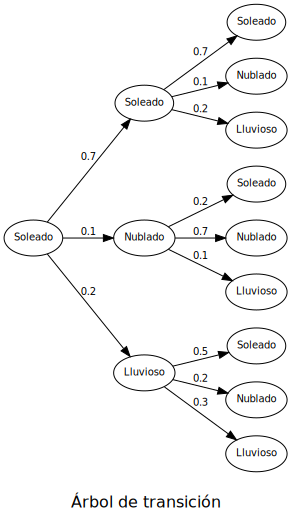

In [2]:
g = Digraph()
g.attr(rankdir='LR', label='\nÁrbol de transición', fontsize='16', fontname='Lato')
g.attr('node', fontsize='10', fontname='Lato')
g.attr('edge', fontsize='10', fontname='Lato')

g.node('1a', 'Soleado')

g.node('1b', 'Soleado')
g.node('2b', 'Nublado')
g.node('3b', 'Lluvioso')

g.node('1c', 'Soleado')
g.node('2c', 'Nublado')
g.node('3c', 'Lluvioso')

g.node('1d', 'Soleado')
g.node('2d', 'Nublado')
g.node('3d', 'Lluvioso')

g.node('1e', 'Soleado')
g.node('2e', 'Nublado')
g.node('3e', 'Lluvioso')

g.edge('1a', '1b', '0.7')
g.edge('1a', '2b', '0.1')
g.edge('1a', '3b', '0.2')
g.edge('1b', '1c', '0.7')
g.edge('1b', '2c', '0.1')
g.edge('1b', '3c', '0.2')
g.edge('2b', '1d', '0.2')
g.edge('2b', '2d', '0.7')
g.edge('2b', '3d', '0.1')
g.edge('3b', '1e', '0.5')
g.edge('3b', '2e', '0.2')
g.edge('3b', '3e', '0.3')

g

## Probabilidades de Estado

Si se denota la probabilidad $p_{ij}^{(n)}$ como la probabilidad de transición del estado $i$ al estado $j$ en $n$ pasos.

El cálculo de $p_{11}^{(2)}$ sería

\begin{equation}
(0.7)(0.7)+(0.1)(0.2)+(0.2)(0.5)\\
=(p_{11})(p_{11})+(p_{12})(p_{21})+(p_{13})(p_{31})\\
= 0.61
\end{equation}

Es posible generalizar que para cualquier $i$ y $j$, $p_{ij}^{(2)}$ es el producto interno de la $i$-ésima fila de $\mathbf{P}$ con la $j$-ésima columna de $\mathbf{P}$.

\begin{equation}
    p_{ij}^{(2)} = \sum_{k=1}^{N}p_{ik}p_{kj}
\end{equation}

In [3]:
import numpy as np
p = np.array([[0.7, 0.1, 0.2], [0.2, 0.7, 0.1], [0.5, 0.2, 0.3]])
p

array([[0.7, 0.1, 0.2],
       [0.2, 0.7, 0.1],
       [0.5, 0.2, 0.3]])

In [4]:
p2 = p @ p
p2

array([[0.61, 0.18, 0.21],
       [0.33, 0.53, 0.14],
       [0.54, 0.25, 0.21]])

In [5]:
from IPython.display import display, Markdown
display(Markdown(rf'$p^2_{{11}} =$ {p2[0, 0]:.2f}'))

$p^2_{11} =$ 0.61

Lo que implica que la probabilidad que sea soleado dentro de dos días dado que hoy es soleado es igual a $0.61$.

----

Siendo `@` en numpy el operador para la multiplicación matricial o la multiplicación punto, siendo `p @ p` equivalente a `p.dot(p)`.

Se puede generalizar aún más esta expresión, llegando a lo que se conoce como la **Ecuación de Chapman-Kolgomorov**:

\begin{equation}
    p_{ij}^{(n)} = p_{ij}^{n} = \sum_{k=1}^{N}p_{ik}^{n-m}p_{kj}^m
\end{equation}

## Clasificación de los estados en un proceso de Markov

Un estado $j$ es **alcanzable** desde el estado $i$ si hay una secuencia de transiciones que comienza en estado $i$ y termina en estado $j$. Esto es, $p^{(n)}_{ij} \gt 0$ para algún $n$.

Una cadena Markov **irreducible** es aquella en la que se puede llegar a todos los estados desde todos los demás estados. Es decir, en una cadena irreducible, no es posible que el proceso quede *atrapado* y de ahí en adelante solo pueda hacer transiciones dentro de algún subconjunto de los estados.

Se dice que un conjunto de estados está **cerrado** si no se puede llegar a ningún estado fuera del conjunto desde ningún estado dentro del conjunto. Esto significa que una vez que el sistema entra en cualquier estado en el conjunto, nunca saldrá de este conjunto. En una cadena irreducible, sus estados constituyen un conjunto cerrado y ningún subconjunto de estos estados está cerrado.

Un caso particularmente interesante se presenta si un conjunto cerrado contiene sólo un estado. Este estado $i$ se llama **estado absorbente**, y $p_{ii} = 1$. El sistema nunca deja un estado de absorción.

Un estado $i$ es un **estado transitorio** si hay una transición del estado $i$ a otro estado $j$ desde la cual no se puede volver a alcanzar el estado $i$. Por lo tanto, siempre que se sale de un estado transitorio, hay una probabilidad positiva de que no se vuelva a ocupar nunca más. Y por lo tanto, la probabilidad a largo plazo de que un sistema se encuentre en un estado transitorio es esencialmente nula porque, con el tiempo, se saldrá del estado y no volverá a entrar.

Un **estado recurrente** es cualquier estado que no sea transitorio. En una cadena de Markov irreducible de estados finitos, todos los estados son recurrentes. Un caso especial de un estado recurrente es un estado absorbente, desde el cual no se puede alcanzar ningún otro estado.

Se dice que un estado es **periódico** si está ocupado sólo en momentos que difieren entre sí por múltiplos de alguna constante mayor que $1$.